# Stock Market Analysis 

 In this portfolio project I will be looking at data from the stock market, particularly some technology stocks. I used pandas to get stock information, visualize different aspects of it, and finally I roughly analyzed the risk of the stocks, based on their previous performance history. We will also be predicting future stock prices through a Monte Carlo method. 

In this project I tried to answer the following questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

## Basic Analysis of Stock Information

In this section I will go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime
from pandas.plotting import scatter_matrix
# For division
from __future__ import division
from statsmodels.tsa.seasonal import seasonal_decompose

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime(2016,12,31)
start = datetime(end.year - 6,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [3]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,46.135715,46.211430,45.901428,46.080002,41.456154,48377000
2011-01-03,46.520000,47.180000,46.405716,47.081429,42.357094,111284600
2011-01-04,47.491428,47.500000,46.878571,47.327145,42.578156,77270200
2011-01-05,47.078571,47.762856,47.071430,47.714287,42.926441,63879900
2011-01-06,47.817142,47.892857,47.557144,47.675713,42.891743,75107200


Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,86.458866,87.232562,85.614247,86.432348,81.218276,8.492246e+07
std,24.178659,24.357734,23.978400,24.170082,24.633203,5.405898e+07
min,45.240002,45.385715,44.357143,45.045715,40.525654,1.147590e+07
25%,64.969288,65.380001,64.189999,64.712857,59.052606,4.561915e+07
50%,85.794289,86.699997,85.037140,86.142860,78.114563,7.104370e+07
75%,107.890000,108.885002,106.820000,107.939999,104.190297,1.089676e+08
max,134.460007,134.539993,131.399994,133.000000,126.941574,4.702495e+08


In [5]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2010-12-31 to 2016-12-30
Data columns (total 6 columns):
Open         1511 non-null float64
High         1511 non-null float64
Low          1511 non-null float64
Close        1511 non-null float64
Adj Close    1511 non-null float64
Volume       1511 non-null int64
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

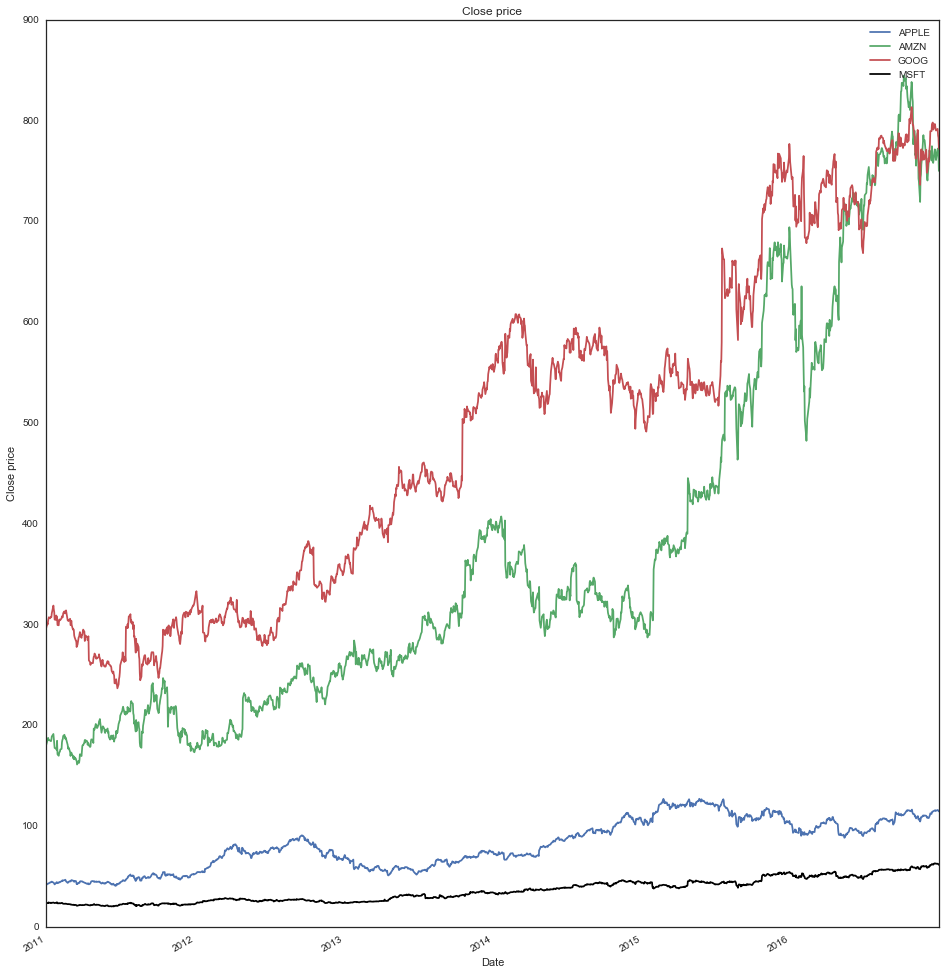

In [6]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(label='APPLE',figsize=(16,18),title='Close price')
AMZN['Adj Close'].plot(label='AMZN')
GOOG['Adj Close'].plot(label='GOOG')
MSFT['Adj Close'].plot(label="MSFT",color='black')
plt.ylabel("Close price")
plt.legend()
#AAPL[].plot(legend=True,figsize=(10,4))

 Now let's plot the total volume of stock being traded each day over the past 3 years


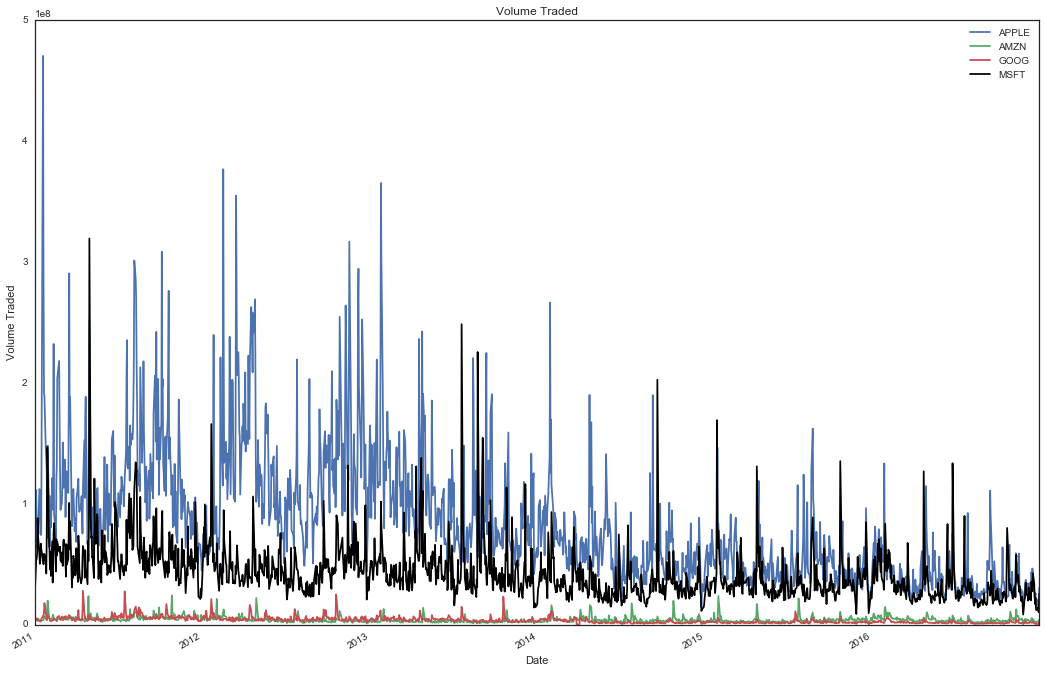

In [7]:
AAPL['Volume'].plot(label='APPLE',figsize=(18,12),title='Volume Traded')
AMZN['Volume'].plot(label='AMZN')
GOOG['Volume'].plot(label='GOOG')
MSFT["Volume"].plot(label="MSFT",color='black')
plt.ylabel("Volume Traded")
plt.legend()

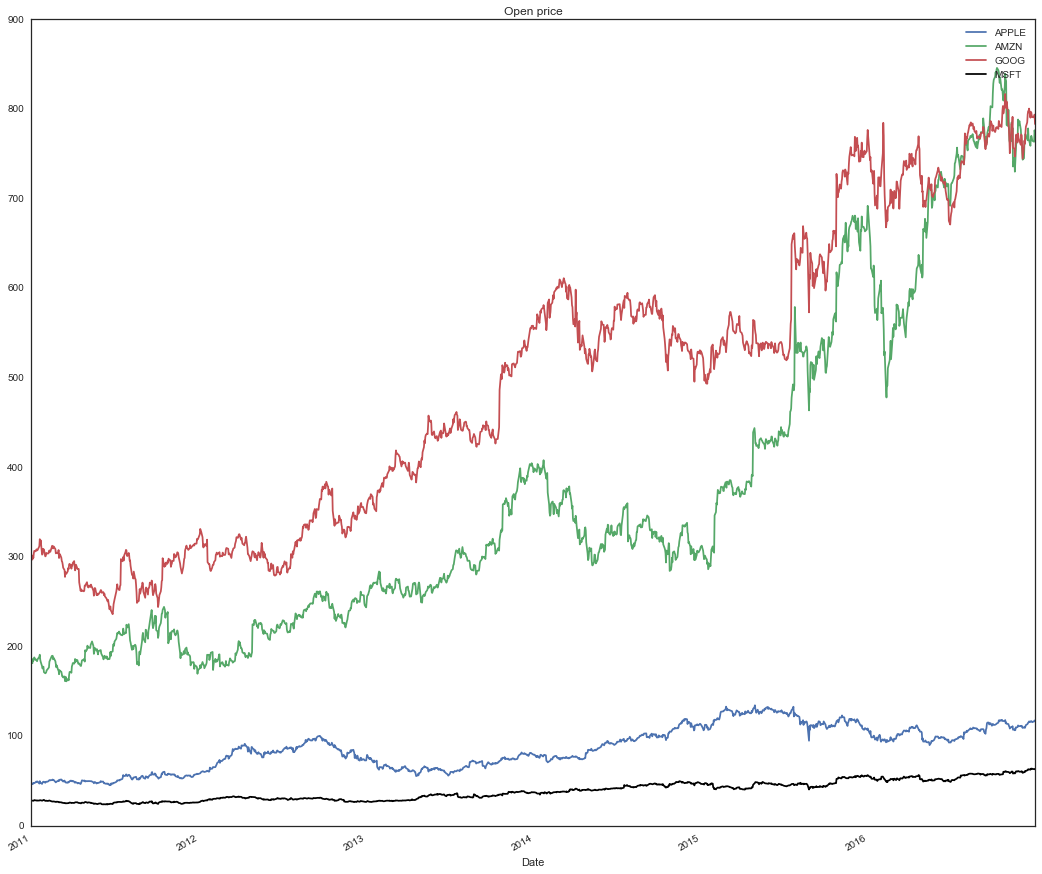

In [8]:
AAPL['Open'].plot(label='APPLE',figsize=(18,16),title='Open price')
AMZN['Open'].plot(label='AMZN')
GOOG['Open'].plot(label='GOOG')
MSFT["Open"].plot(label="MSFT",color='black')
plt.legend()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

The Open Price Time Series Visualization makes Google look like its always been much more valuable as a company than others. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at <em><strong>10 each versus 100000 units of stock at <strong><em>1 each)


Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [9]:
AAPL['Total Traded'] = AAPL['Open']*AAPL['Volume']
AMZN['Total Traded'] = AMZN['Open']*AMZN['Volume']
GOOG['Total Traded'] = GOOG['Open']*GOOG['Volume']
MSFT['Total Traded'] = MSFT['Open']*MSFT['Volume']


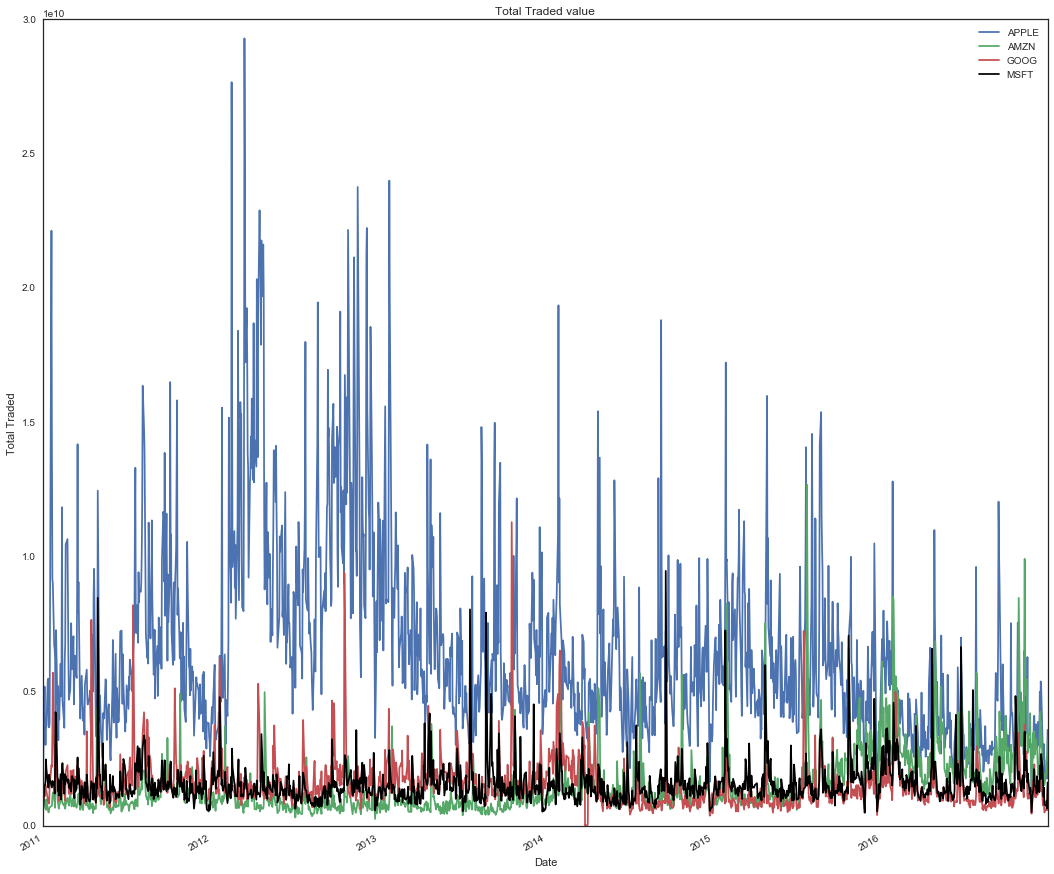

In [10]:
AAPL['Total Traded'].plot(label='APPLE',figsize=(18,16),title='Total Traded value')
AMZN['Total Traded'].plot(label='AMZN')
GOOG['Total Traded'].plot(label='GOOG')
MSFT['Total Traded'].plot(label="MSFT",color='black')
plt.legend()
plt.ylabel("Total Traded")

It looks like that the total traded value of apple is  greater than others.

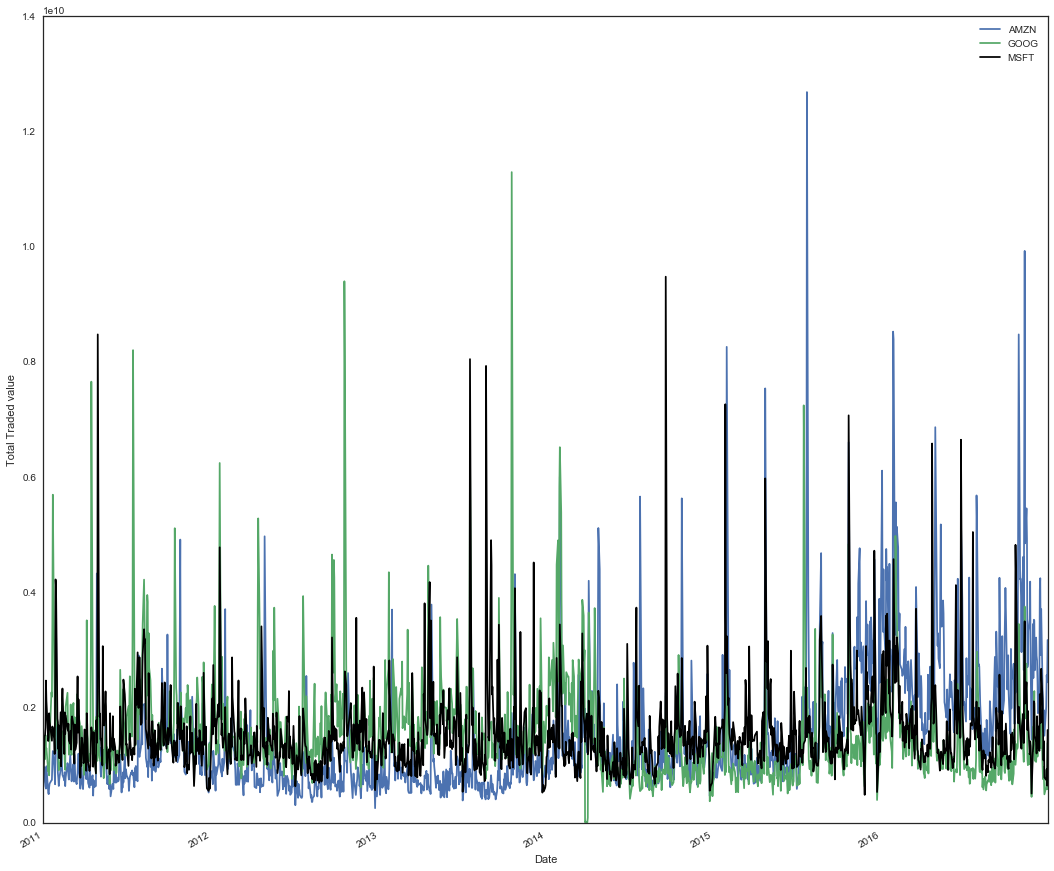

In [11]:
#AAPL['Total Traded'].plot(label='APPLE',figsize=(18,16),title='Total Traded value')
AMZN['Total Traded'].plot(label='AMZN',figsize=(18,16))
GOOG['Total Traded'].plot(label='GOOG')
MSFT['Total Traded'].plot(label="MSFT",color='black')
plt.legend()
plt.ylabel("Total Traded value")

When is the maximum  and minimum total traded time of Apple?

In [12]:
print (AAPL['Total Traded'].argmax(), AAPL['Volume'].max())
print (AAPL['Total Traded'].argmin(), AAPL['Volume'].min())

(Timestamp('2012-03-14 00:00:00'), 470249500)
(Timestamp('2016-11-25 00:00:00'), 11475900)


# EWMA
## Exponentially-weighted moving average 

Instead of simple moving average(SMA) I prefered to use EWMA for the following reasons.
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in our data.
* Extreme historical values can skew our SMA significantly



For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [13]:
AAPL['MA360'] = AAPL['Adj Close'].ewm(span=365).mean()
AMZN['MA360'] = AMZN['Adj Close'].ewm(span=365).mean()
GOOG['MA360'] = GOOG['Adj Close'].ewm(span=365).mean()
MSFT['MA360'] = MSFT['Adj Close'].ewm(span=365).mean()


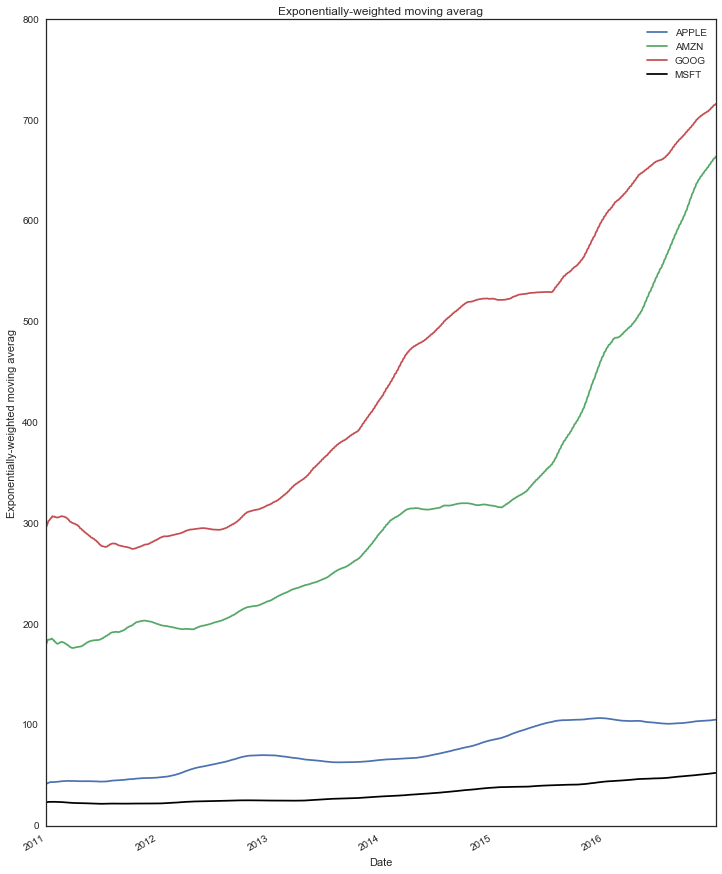

In [14]:
AAPL['MA360'].plot(label='APPLE',figsize=(12,16),title='Exponentially-weighted moving averag')
AMZN['MA360'].plot(label='AMZN')
GOOG['MA360'].plot(label='GOOG')
MSFT['MA360'].plot(label="MSFT",color='black')
plt.ylabel('Exponentially-weighted moving averag')
plt.legend()

Finally lets see if there is a relationship between these stocks, after all, they are all related to the tech company. We can see this easily through a scatter matrix plot. 

In [15]:
tech_comp = pd.concat([AAPL['Open'],AMZN['Open'],GOOG['Open'], MSFT['Open']],axis=1)
tech_comp.columns = ['AAPL Open','AMZN Open','GOOG Open','MSFT Open']
tech_comp.head()

,AAPL Open,AMZN Open,GOOG Open,MSFT Open
Date,,,,
2010-12-31,46.135715,181.960007,297.255798,27.799999
2011-01-03,46.520000,181.369995,297.126312,28.049999
2011-01-04,47.491428,186.149994,301.679230,27.940001
2011-01-05,47.078571,184.100006,298.914581,27.900000
2011-01-06,47.817142,186.500000,304.199799,28.040001


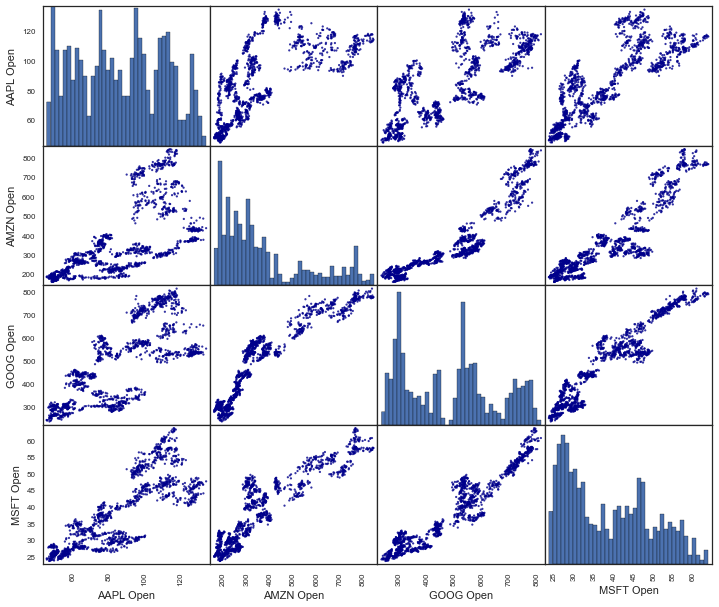

In [16]:
scatter_matrix(tech_comp,figsize=(12,10),alpha=0.8,hist_kwds={'bins':40},color="darkblue");

It is interesting to see that the opening price of Apple is less correlated with the others and the opening price of 
Amazon, Microsoft and google are correlated.

/Users/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


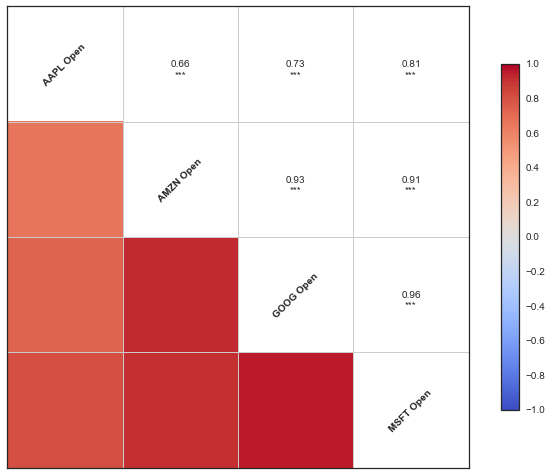

In [17]:
fig, ax = plt.subplots()
# the size of A4 paper|
fig.set_size_inches(11.7, 8.27)
sns.corrplot(tech_comp.dropna(), annot=True)

# Basic Financial Analysis

## Daily Percentage Change¶

 Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs the percent gain (or loss) if we bought the stock one day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [18]:
AAPL['returns'] = AAPL['Adj Close'].pct_change(1)
AMZN['returns'] =AMZN['Adj Close'].pct_change(1)
GOOG['returns'] =GOOG['Adj Close'].pct_change(1)
MSFT['returns'] =MSFT['Adj Close'].pct_change(1)

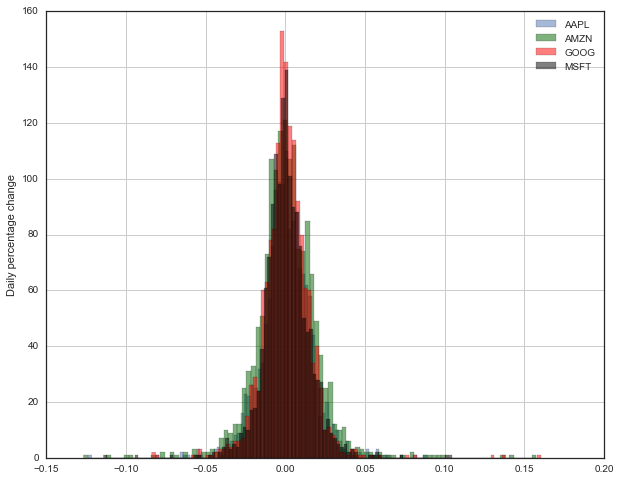

In [19]:
AAPL['returns'].hist(bins=100,label='AAPL',figsize=(10,8),alpha=0.5)
AMZN['returns'].hist(bins=100,label='AMZN',alpha=0.5,color='darkgreen')
GOOG['returns'].hist(bins=100,label='GOOG',alpha=0.5,color='red')
MSFT['returns'].hist(bins=100,label='MSFT',alpha=0.5,color='black')
plt.ylabel('Daily percentage change')
plt.legend()

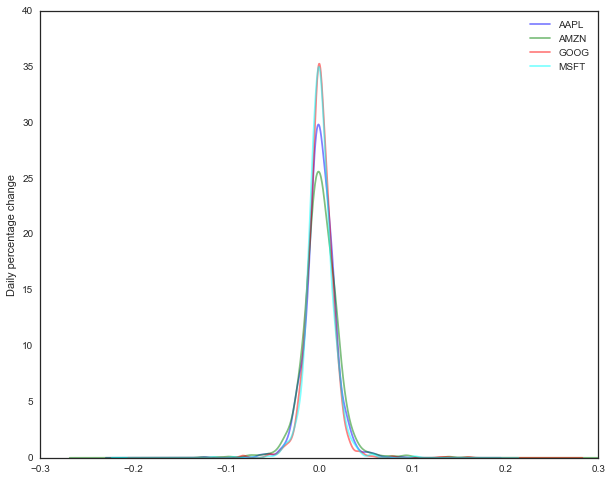

In [20]:
AAPL['returns'].plot(kind='kde',label='AAPL',figsize=(10,8),alpha=0.5,color ='blue')
AMZN['returns'].plot(kind='kde',label='AMZN',alpha=0.5,color='green')
GOOG['returns'].plot(kind='kde',label='GOOG',alpha=0.5,color='Red' )
MSFT['returns'].plot(kind='kde',label='MSFT',alpha=0.5,color='cyan')
plt.ylabel('Daily percentage change')
plt.legend()

It is interesting to see that almost all  four of the tech stocks have very similar distribution eventhough Amazon stock seems a little bit volatile compared to others.

## Cumulative Daily Returns

 Now we can see which stock was the most wide ranging in daily returns ( and we  have realized it was a little bit of Amazon).

With daily cumulative returns, the question I am trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. 


**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be


**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, we are making profits else we are in loss. So for the above example cumulative gains are as follows

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+ our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [21]:
AAPL['Cumulative Return'] = (1 + AAPL['returns']).cumprod()
AMZN['Cumulative Return'] = (1 + AMZN['returns']).cumprod()
GOOG['Cumulative Return'] = (1 + GOOG['returns']).cumprod()
MSFT['Cumulative Return'] = (1 + MSFT['returns']).cumprod()

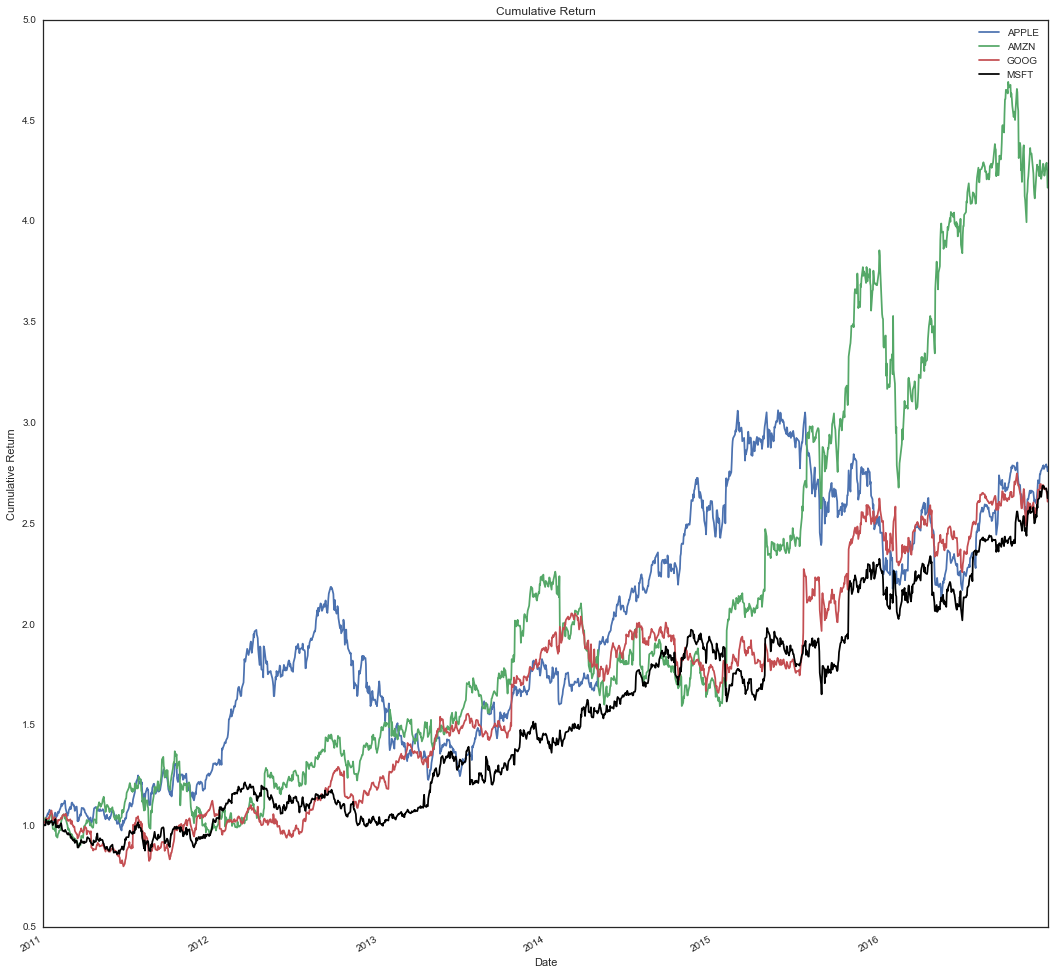

In [22]:
AAPL['Cumulative Return'].plot(label='APPLE',figsize=(18,18),title='Cumulative Return')
AMZN['Cumulative Return'].plot(label='AMZN')
GOOG['Cumulative Return'].plot(label='GOOG')
MSFT['Cumulative Return'].plot(label="MSFT",color='black')
plt.legend()
plt.ylabel("Cumulative Return")

In [23]:
#AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [24]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
tech_returns = closing_df.pct_change(1)

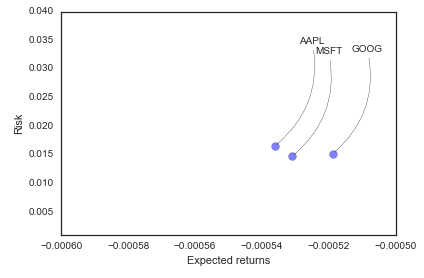

In [25]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.001,0.04])
plt.xlim([-0.0006,-0.0005])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

Now we can use quantile to get the risk value for the stock.

In [26]:
0.025666 *1000000

25666.0

In [27]:
# The 0.05 empirical quantile of daily returns
stock=['AAPL','AMZN','GOOG',"MSFT"]
for s in stock:
    print "the 5 % emperical quantile of {0} is : {1}".format(s, rets[s].quantile(0.05))

the 5 % emperical quantile of AAPL is : -0.0256660135143
the 5 % emperical quantile of AMZN is : -0.0275366724207
the 5 % emperical quantile of GOOG is : -0.0211417462422
the 5 % emperical quantile of MSFT is : -0.0226003297264


For example, the 0.05 empirical quantile of daily returns for Apple is at -0.025666. That means that with 95% confidence, our worst daily loss will not exceed 2.56%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025666 * 1,000,000 = $25666.0.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

# Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Apple DataFrame.

In [28]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['AAPL']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AAPL']

This function  takes in the starting price and number of days, and uses the sigma and mu we already calculated form out daily returns

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


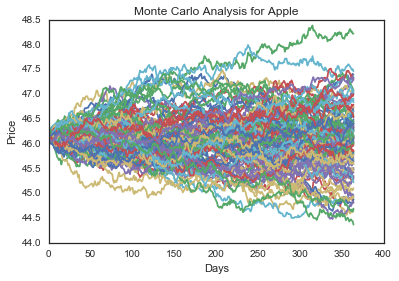

In [30]:
# Get start price from AAPL.head()
start_price = 46.135715

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [31]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


(array([ 1.,  0.,  2., ...,  0.,  1.,  3.]),
 array([ 43.42088564,  43.47506626,  43.52924688, ...,  48.73058601,
         48.78476663,  48.83894724]),
 <a list of 100 Patch objects>)

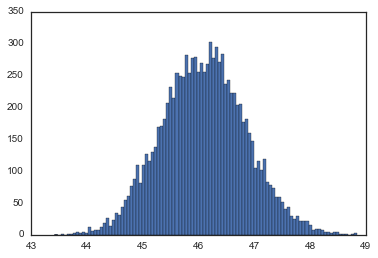

In [32]:
plt.hist(simulations,bins=100)

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

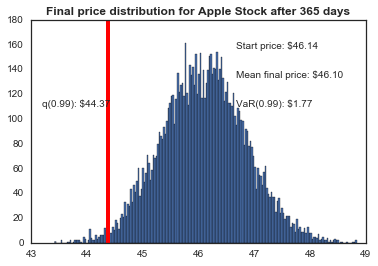

In [33]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');

 Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Apple stock, which looks to be $1.77 for every investment of 46.14 (the price of one inital apple stock).

This basically means for every initial stock you purchase your putting about $1.77 at risk 99% of the time from our Monte Carlo Simulation.